In [ ]:
import umap
!pip install umap-learn[plot]
import umap.plot
from umap import UMAP
import time
import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, matthews_corrcoef, make_scorer
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 69.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mnist = sklearn.datasets.fetch_openml('mnist_784')
print(mnist.data.shape)

(70000, 784)


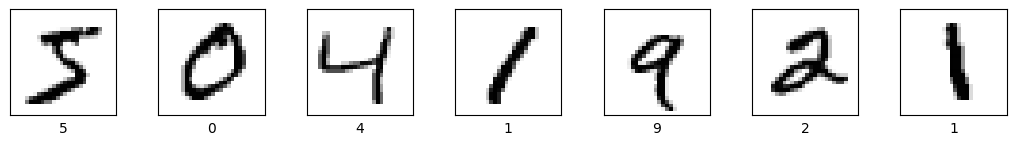

In [ ]:
names = [i for i in range(10)]
plt.figure(figsize=(15, 8))
for i in range(7):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(mnist.data.iloc[i]).reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(names[int(mnist.target[i])])
plt.show()

In [ ]:
X, y = mnist.data.to_numpy(), mnist.target.astype(int)
X = X.astype(np.float32) / 255.0

In [ ]:
umap_3d_embeddings = UMAP(n_components=3, random_state=7).fit_transform(X)

In [ ]:
X.shape

(70000, 784)

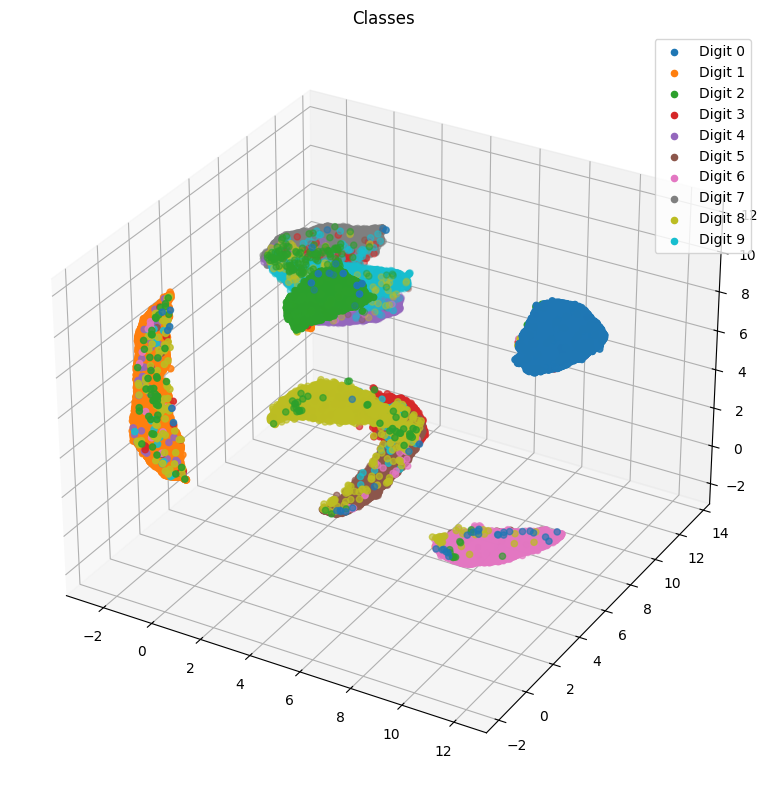

In [ ]:
plt.figure(figsize=(8,8))

ax = plt.axes(projection='3d')

for i in np.unique(y):
    digit_indices = (y == i)
    dims = [umap_3d_embeddings[digit_indices, i] for i in range(umap_3d_embeddings.shape[1])]
    ax.scatter(*dims, label=f"Digit {i}")
    ax.legend(loc='best')

plt.title('Classes')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
def estimate_knn(X_train, X_test, y_train, y_test):
    metrics = ['cosine', 'euclidean', 'manhattan', 'chebyshev', 'minkowski']
    neighbors = np.arange(1, 16)
    mcc = np.zeros((len(metrics), len(neighbors)))
    max_mcc = None
    best_model = None
    best_y_pred = None

    for i, metric in enumerate(metrics):
        for j, n in enumerate(neighbors):
            print(f'metric: {metric}, n: {n} - ', end='')
            knn = KNeighborsClassifier(n_neighbors=n, weights='distance', metric=metric)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            mcc[i][j] = matthews_corrcoef(y_test, y_pred)
            print(mcc[i][j], end='')

            if max_mcc is None or mcc[i][j] > max_mcc + 1e-4:
                print(' - NEW BEST')
                max_mcc = mcc[i][j]
                best_model = knn
                best_y_pred = y_pred
            else:
                print()

    fig, ax = plt.subplots(figsize=(15,5))
    sns.heatmap(mcc, annot=True, ax=ax, cmap='Reds', xticklabels=neighbors, yticklabels=metrics, fmt='.3g')

    print("\nClassification Report:")
    print(classification_report(y_test, best_y_pred))
    print("\nAdditional Metrics:")
    print(f"MCC: {max_mcc:.4f}\n")

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, best_y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return best_model

metric: cosine, n: 1 - 0.9125986907710907 - NEW BEST
metric: cosine, n: 2 - 0.9137059717487888 - NEW BEST
metric: cosine, n: 3 - 0.9229170963775468 - NEW BEST
metric: cosine, n: 4 - 0.9269709507602804 - NEW BEST
metric: cosine, n: 5 - 0.929754656619912 - NEW BEST
metric: cosine, n: 6 - 0.9323025974618963 - NEW BEST
metric: cosine, n: 7 - 0.9335745728006275 - NEW BEST
metric: cosine, n: 8 - 0.9342904665316452 - NEW BEST
metric: cosine, n: 9 - 0.9352457519111851 - NEW BEST
metric: cosine, n: 10 - 0.9355698682675468 - NEW BEST
metric: cosine, n: 11 - 0.9362090021208078 - NEW BEST
metric: cosine, n: 12 - 0.9362893813694171
metric: cosine, n: 13 - 0.9366880337505706 - NEW BEST
metric: cosine, n: 14 - 0.9373256826109857 - NEW BEST
metric: cosine, n: 15 - 0.9376474379710733 - NEW BEST
metric: euclidean, n: 1 - 0.9453830267966709 - NEW BEST
metric: euclidean, n: 2 - 0.9453830267966709
metric: euclidean, n: 3 - 0.9613450355598671 - NEW BEST
metric: euclidean, n: 4 - 0.9647636611270929 - NEW BES

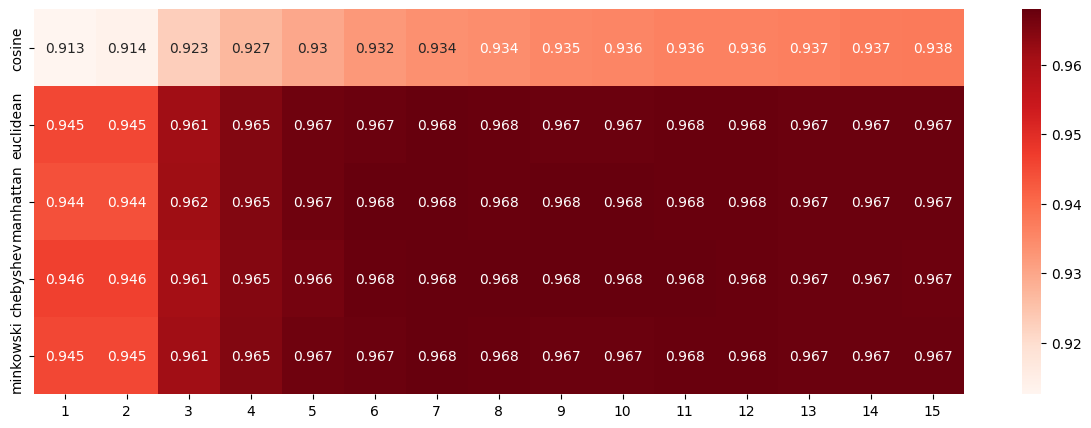

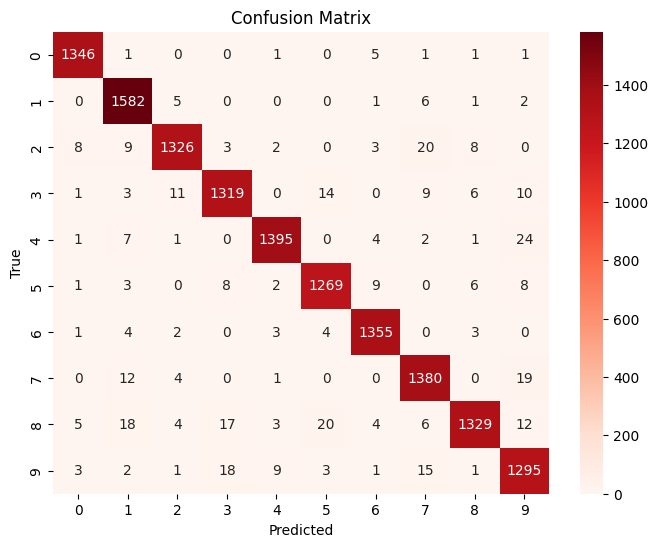

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(umap_3d_embeddings, y, test_size=0.2)
best_knn = estimate_knn(X_train, X_test, y_train, y_test)

In [ ]:
clf_report_best_knn = classification_report(y_test, best_knn.predict(X_test), output_dict=True)

In [ ]:
def fit_ensemble(models, X_train, y_train, X_test, y_test):
    meta_X = []
    for name, model in models:
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        yhat = yhat.reshape(len(yhat), 1)
        meta_X.append(yhat)

        print(name)
        print(classification_report(y_test, yhat))
        print("\nAdditional Metrics:")
        print(f"MCC: {matthews_corrcoef(y_test, yhat):.4f}\n")

    meta_X = np.hstack(meta_X)
    blender = LogisticRegression()
    blender.fit(meta_X, y_test)

    return blender

def predict_ensemble(models, blender, X_test):
    meta_X = []
    for name, model in models:
        yhat = model.predict(X_test)
        yhat = yhat.reshape(len(yhat), 1)
        meta_X.append(yhat)

    meta_X = np.hstack(meta_X)

    return blender.predict(meta_X)

In [ ]:
models = [
    ('lr', LogisticRegression()),
    ('knn', best_knn),
    ('cart', DecisionTreeClassifier()),
    ('svm', SVC()),
    ('bayes', GaussianNB()),
]

In [ ]:
blender = fit_ensemble(models, X_train, y_train, X_test, y_test)
y_pred = predict_ensemble(models, blender, X_test)

lr
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.96      0.99      0.98      1597
           2       0.98      0.96      0.97      1379
           3       0.96      0.96      0.96      1373
           4       0.98      0.95      0.97      1435
           5       0.95      0.97      0.96      1306
           6       0.98      0.99      0.98      1372
           7       0.94      0.98      0.96      1416
           8       0.98      0.92      0.95      1418
           9       0.92      0.95      0.94      1348

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.97      0.96      0.96     14000


Additional Metrics:
MCC: 0.9609

knn
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.96      0.99      0.98      1597
           2       0.98      0.96    


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.96      0.98      0.97      1597
           2       0.97      0.95      0.96      1379
           3       0.96      0.92      0.94      1373
           4       0.94      0.96      0.95      1435
           5       0.94      0.95      0.94      1306
           6       0.95      0.98      0.96      1372
           7       0.96      0.95      0.95      1416
           8       0.96      0.93      0.94      1418
           9       0.94      0.95      0.95      1348

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000


Additional Metrics:
MCC: 0.9507



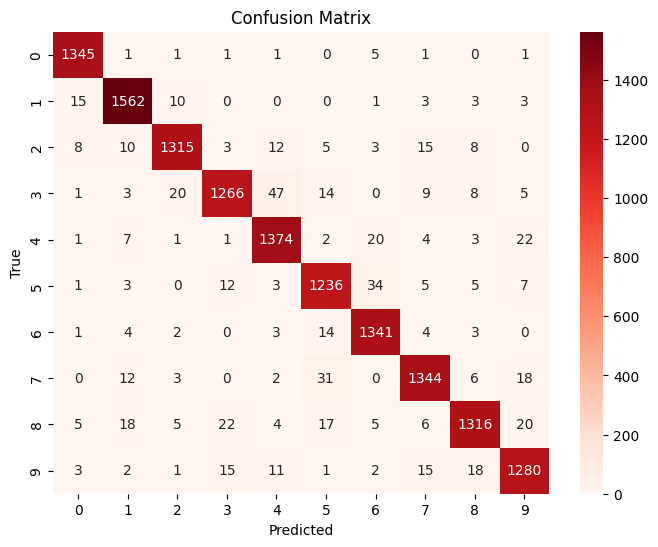

In [ ]:
print("\nClassification Report:")
clf_report_blending_1 = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))
print("\nAdditional Metrics:")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}\n")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

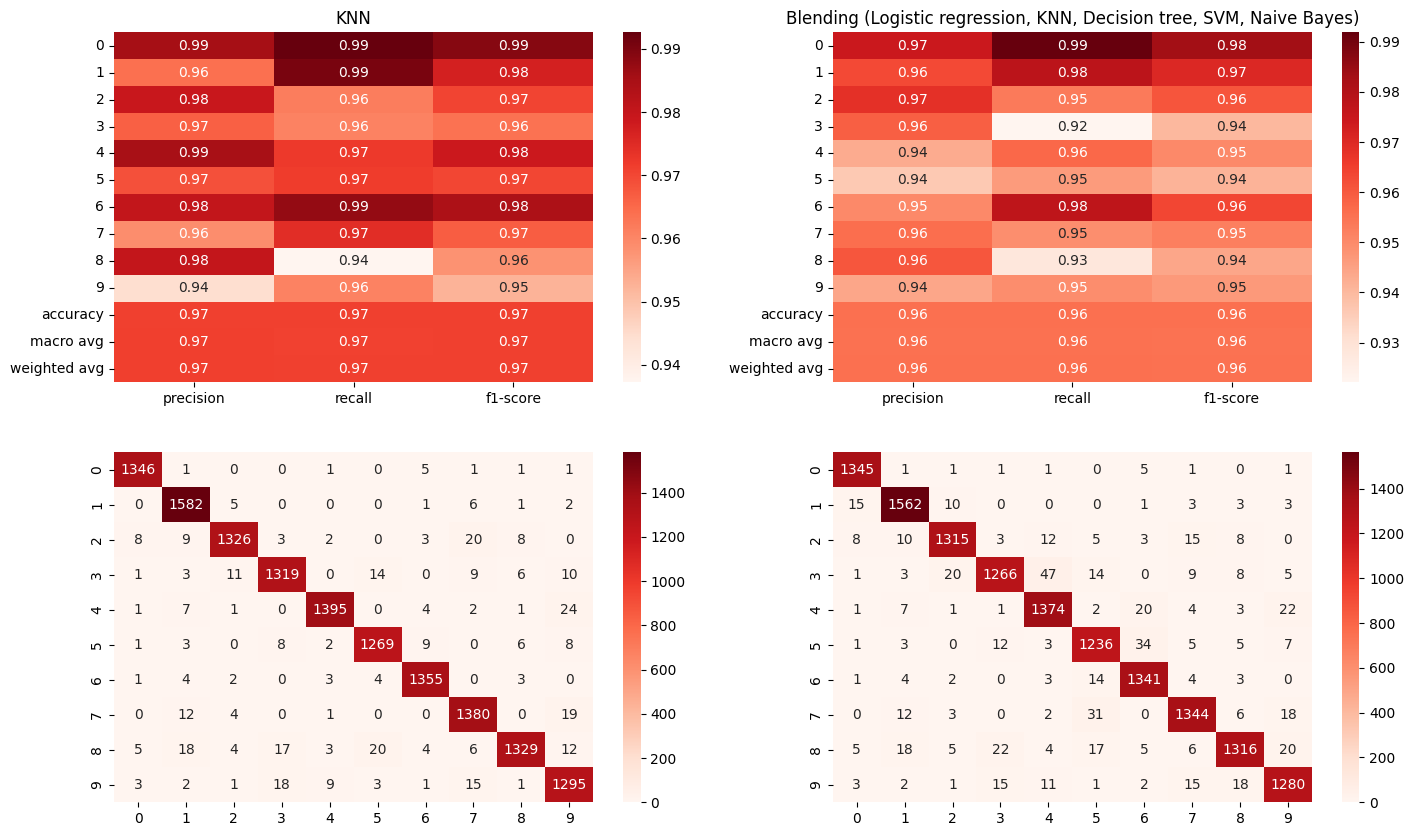

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(17, 10))
sns.heatmap(pd.DataFrame(clf_report_best_knn).iloc[:-1, :].T, ax=axes[0, 0], annot=True, cmap='Reds')
sns.heatmap(pd.DataFrame(clf_report_blending_1).iloc[:-1, :].T, ax=axes[0, 1], annot=True, cmap='Reds')
sns.heatmap(confusion_matrix(y_test, best_knn.predict(X_test)), ax=axes[1, 0], annot=True, fmt='d', cmap='Reds')
sns.heatmap(confusion_matrix(y_test, predict_ensemble(models, blender, X_test)), ax=axes[1, 1], annot=True, fmt='d', cmap='Reds')
axes[0, 0].set_title('KNN')
axes[0, 1].set_title('Blending (Logistic regression, KNN, Decision tree, SVM, Naive Bayes)')
plt.show()

In [ ]:
models = [
    ('lr', LogisticRegression()),
    ('knn', best_knn),
]

blender = fit_ensemble(models, X_train, y_train, X_test, y_test)
y_pred = predict_ensemble(models, blender, X_test)

lr
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.96      0.99      0.98      1597
           2       0.98      0.96      0.97      1379
           3       0.96      0.96      0.96      1373
           4       0.98      0.95      0.97      1435
           5       0.95      0.97      0.96      1306
           6       0.98      0.99      0.98      1372
           7       0.94      0.98      0.96      1416
           8       0.98      0.92      0.95      1418
           9       0.92      0.95      0.94      1348

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.97      0.96      0.96     14000


Additional Metrics:
MCC: 0.9609

knn
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.96      0.99      0.98      1597
           2       0.98      0.96    

In [ ]:
print("\nClassification Report:")
clf_report_blending_2 = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))
print("\nAdditional Metrics:")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}\n")


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.96      0.99      0.98      1597
           2       0.97      0.96      0.97      1379
           3       0.96      0.96      0.96      1373
           4       0.98      0.97      0.98      1435
           5       0.97      0.97      0.97      1306
           6       0.98      0.99      0.98      1372
           7       0.96      0.97      0.97      1416
           8       0.96      0.94      0.95      1418
           9       0.95      0.94      0.95      1348

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000


Additional Metrics:
MCC: 0.9652



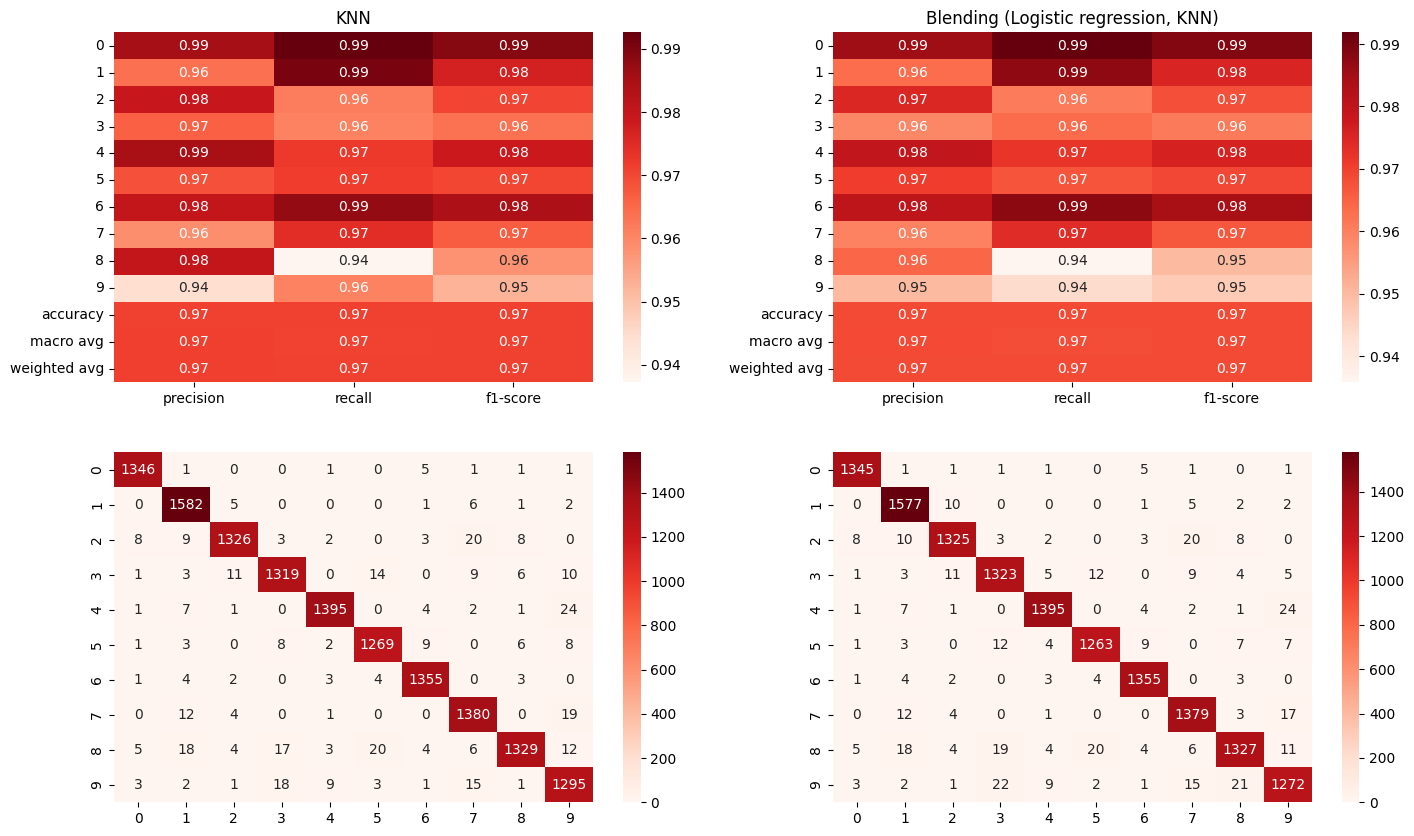

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(17, 10))
sns.heatmap(pd.DataFrame(clf_report_best_knn).iloc[:-1, :].T, ax=axes[0, 0], annot=True, cmap='Reds')
sns.heatmap(pd.DataFrame(clf_report_blending_2).iloc[:-1, :].T, ax=axes[0, 1], annot=True, cmap='Reds')
sns.heatmap(confusion_matrix(y_test, best_knn.predict(X_test)), ax=axes[1, 0], annot=True, fmt='d', cmap='Reds')
sns.heatmap(confusion_matrix(y_test, predict_ensemble(models, blender, X_test)), ax=axes[1, 1], annot=True, fmt='d', cmap='Reds')
axes[0, 0].set_title('KNN')
axes[0, 1].set_title('Blending (Logistic regression, KNN)')
plt.show()

In [ ]:
models = [
    ('lr', LogisticRegression()),
    ('knn (n=3)', KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')),
    ('knn (n=15)', KNeighborsClassifier(n_neighbors=15, weights='distance', metric='euclidean')),
]

blender = fit_ensemble(models, X_train, y_train, X_test, y_test)
y_pred = predict_ensemble(models, blender, X_test)

lr
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.96      0.99      0.98      1597
           2       0.98      0.96      0.97      1379
           3       0.96      0.96      0.96      1373
           4       0.98      0.95      0.97      1435
           5       0.95      0.97      0.96      1306
           6       0.98      0.99      0.98      1372
           7       0.94      0.98      0.96      1416
           8       0.98      0.92      0.95      1418
           9       0.92      0.95      0.94      1348

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.97      0.96      0.96     14000


Additional Metrics:
MCC: 0.9609

knn (n=3)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1356
           1       0.96      0.98      0.97      1597
           2       0.97      0.


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.96      0.98      0.97      1597
           2       0.97      0.96      0.96      1379
           3       0.95      0.96      0.96      1373
           4       0.99      0.95      0.97      1435
           5       0.97      0.97      0.97      1306
           6       0.98      0.98      0.98      1372
           7       0.92      0.97      0.95      1416
           8       0.97      0.93      0.95      1418
           9       0.95      0.95      0.95      1348

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000


Additional Metrics:
MCC: 0.9599



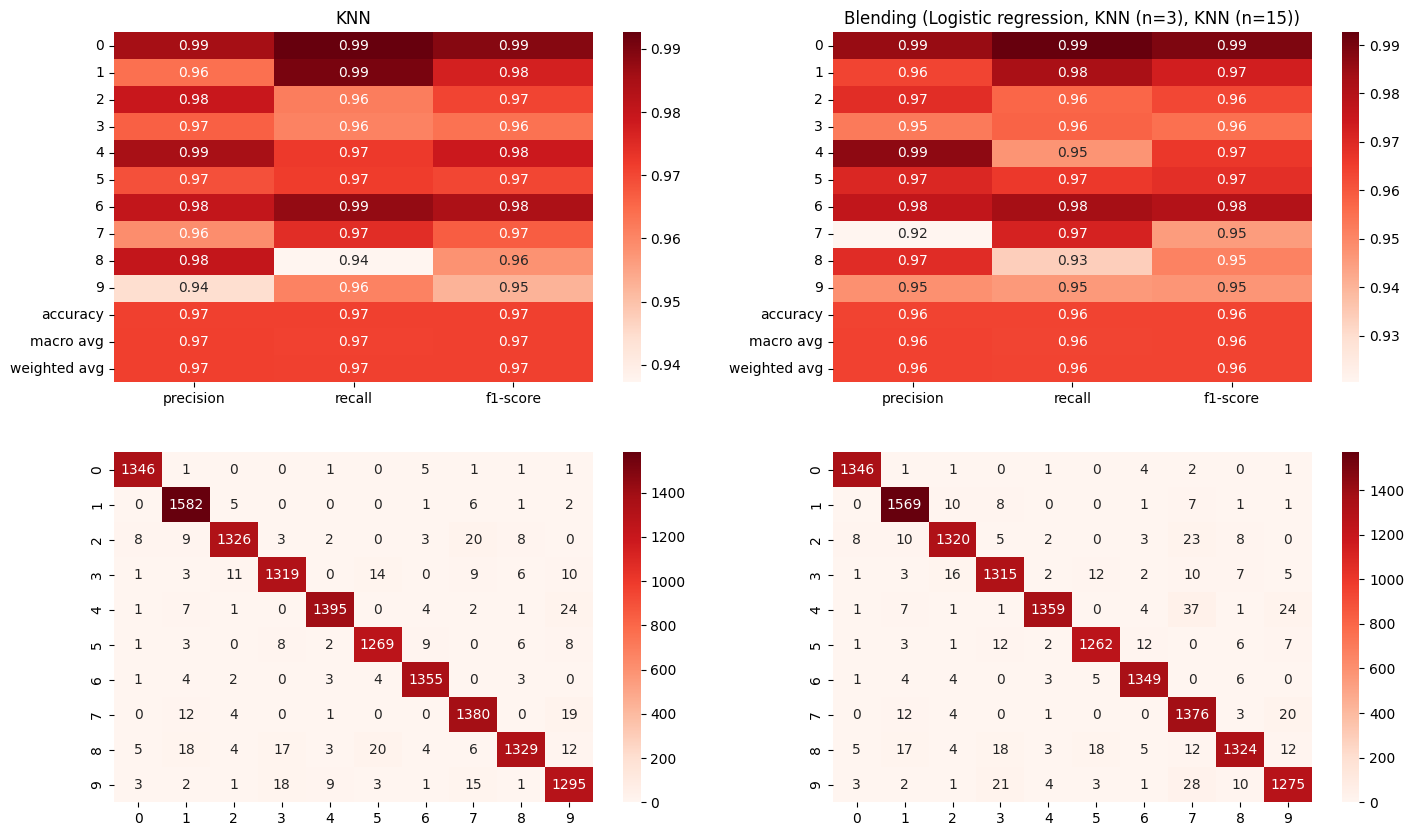

In [ ]:
print("\nClassification Report:")
clf_report_blending_3 = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))
print("\nAdditional Metrics:")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}\n")

fig, axes = plt.subplots(2, 2, figsize=(17, 10))
sns.heatmap(pd.DataFrame(clf_report_best_knn).iloc[:-1, :].T, ax=axes[0, 0], annot=True, cmap='Reds')
sns.heatmap(pd.DataFrame(clf_report_blending_3).iloc[:-1, :].T, ax=axes[0, 1], annot=True, cmap='Reds')
sns.heatmap(confusion_matrix(y_test, best_knn.predict(X_test)), ax=axes[1, 0], annot=True, fmt='d', cmap='Reds')
sns.heatmap(confusion_matrix(y_test, predict_ensemble(models, blender, X_test)), ax=axes[1, 1], annot=True, fmt='d', cmap='Reds')
axes[0, 0].set_title('KNN')
axes[0, 1].set_title('Blending (Logistic regression, KNN (n=3), KNN (n=15))')
plt.show()

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=7)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1356
           1       0.96      0.98      0.97      1597
           2       0.97      0.95      0.96      1379
           3       0.95      0.96      0.96      1373
           4       0.97      0.97      0.97      1435
           5       0.97      0.97      0.97      1306
           6       0.98      0.98      0.98      1372
           7       0.95      0.97      0.96      1416
           8       0.98      0.94      0.96      1418
           9       0.94      0.94      0.94      1348

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000


Additional Metrics:
MCC: 0.9621



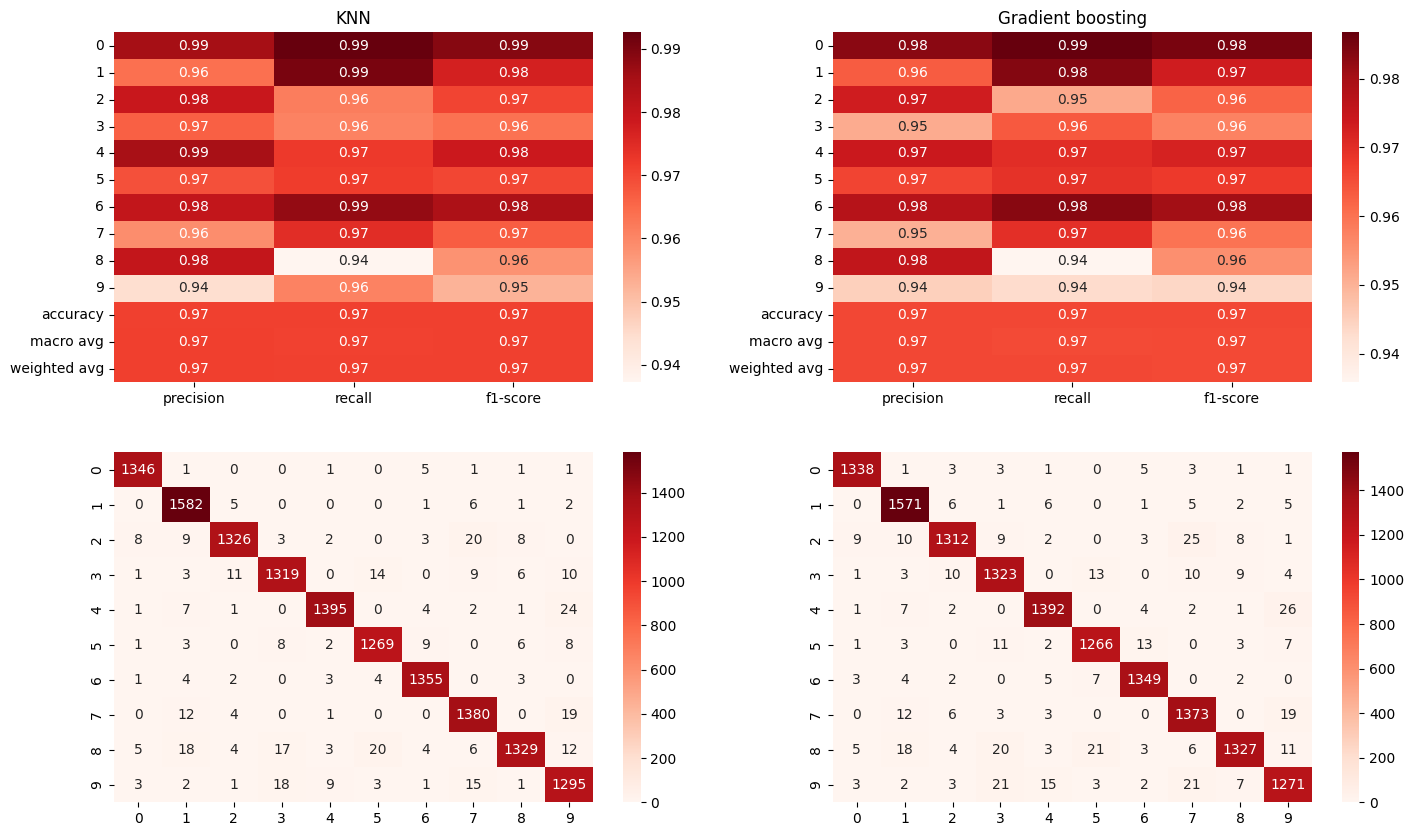

In [ ]:
print("\nClassification Report:")
clf_report_gbm = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))
print("\nAdditional Metrics:")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}\n")

fig, axes = plt.subplots(2, 2, figsize=(17, 10))
sns.heatmap(pd.DataFrame(clf_report_best_knn).iloc[:-1, :].T, ax=axes[0, 0], annot=True, cmap='Reds')
sns.heatmap(pd.DataFrame(clf_report_gbm).iloc[:-1, :].T, ax=axes[0, 1], annot=True, cmap='Reds')
sns.heatmap(confusion_matrix(y_test, best_knn.predict(X_test)), ax=axes[1, 0], annot=True, fmt='d', cmap='Reds')
sns.heatmap(confusion_matrix(y_test, y_pred), ax=axes[1, 1], annot=True, fmt='d', cmap='Reds')
axes[0, 0].set_title('KNN')
axes[0, 1].set_title('Gradient boosting')
plt.show()

In [ ]:
gb = GradientBoostingClassifier(random_state=7, verbose=100500)

param_grid = {
    'n_estimators': [175, 200, 225], # 50, 100, 300
    #'learning_rate': [0.05, 0.1, 0.2],
    #'max_depth': [1, 3, 5],
    'subsample': [0.75, 0.8, 0.85], # 0.6, 1.0
    'max_features': ['sqrt'], #, 'log2', None],
    #'criterion': ['friedman_mse', 'squared_error'],
    #'loss': ['log_loss', 'exponential'] # exponential ==> AdaBoost
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=2,
    scoring=make_scorer(matthews_corrcoef),
    n_jobs=-1,
    verbose=2,
)

In [ ]:
grid_search.fit(X_train[:5000], y_train[:5000])

Fitting 2 folds for each of 9 candidates, totalling 18 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.7463           0.5524           11.55s
         2           1.4497           0.2872           11.44s
         3           1.2039           0.2462           11.79s
         4           1.0237           0.1900           12.17s
         5           0.8627           0.1515           12.14s
         6           0.7534           0.1157           12.31s
         7           0.6594           0.0948           12.24s
         8           0.5856           0.0988           12.08s
         9           0.5021           0.0175           12.03s
        10           0.4494           0.0797           11.89s
        11           0.4097           0.0690           11.88s
        12           0.3678           0.0418           11.92s
        13           0.3322           0.0328           11.83s
        14           0.3000           0.0142           11.74s
        1

GridSearchCV(cv=2,
             estimator=GradientBoostingClassifier(random_state=7, verbose=2),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'],
                         'n_estimators': [175, 200, 225],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring=make_scorer(matthews_corrcoef, response_method='predict'),
             verbose=2)

In [ ]:
# Search №1
best_params = grid_search.best_params_
print(f'Best params: {best_params}')

best_mcc = grid_search.best_score_
print(f'Best MCC: {best_mcc}')

best_model = grid_search.best_estimator_

Best params: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.8}
Best MCC: 0.9662466861098169


In [ ]:
# Search №2
best_params = grid_search.best_params_
print(f'Best params: {best_params}')

best_mcc = grid_search.best_score_
print(f'Best MCC: {best_mcc}')

best_model = grid_search.best_estimator_

Best params: {'criterion': 'friedman_mse', 'loss': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.8}
Best MCC: 0.9662466861098169


In [ ]:
# Search №3
best_params = grid_search.best_params_
print(f'Best params: {best_params}')

best_mcc = grid_search.best_score_
print(f'Best MCC: {best_mcc}')

best_model = grid_search.best_estimator_

Best params: {'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.8}
Best MCC: 0.9662466861098169


In [ ]:
# Search №4
best_params = grid_search.best_params_
print(f'Best params: {best_params}')

best_mcc = grid_search.best_score_
print(f'Best MCC: {best_mcc}')

best_model = grid_search.best_estimator_

Best params: {'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.8}
Best MCC: 0.9662466861098169


In [ ]:
gbm = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.8, max_features='sqrt', random_state=7)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1356
           1       0.96      0.98      0.97      1597
           2       0.97      0.96      0.96      1379
           3       0.95      0.96      0.95      1373
           4       0.98      0.96      0.97      1435
           5       0.95      0.97      0.96      1306
           6       0.98      0.98      0.98      1372
           7       0.95      0.96      0.96      1416
           8       0.97      0.93      0.95      1418
           9       0.94      0.94      0.94      1348

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000


Additional Metrics:
MCC: 0.9596



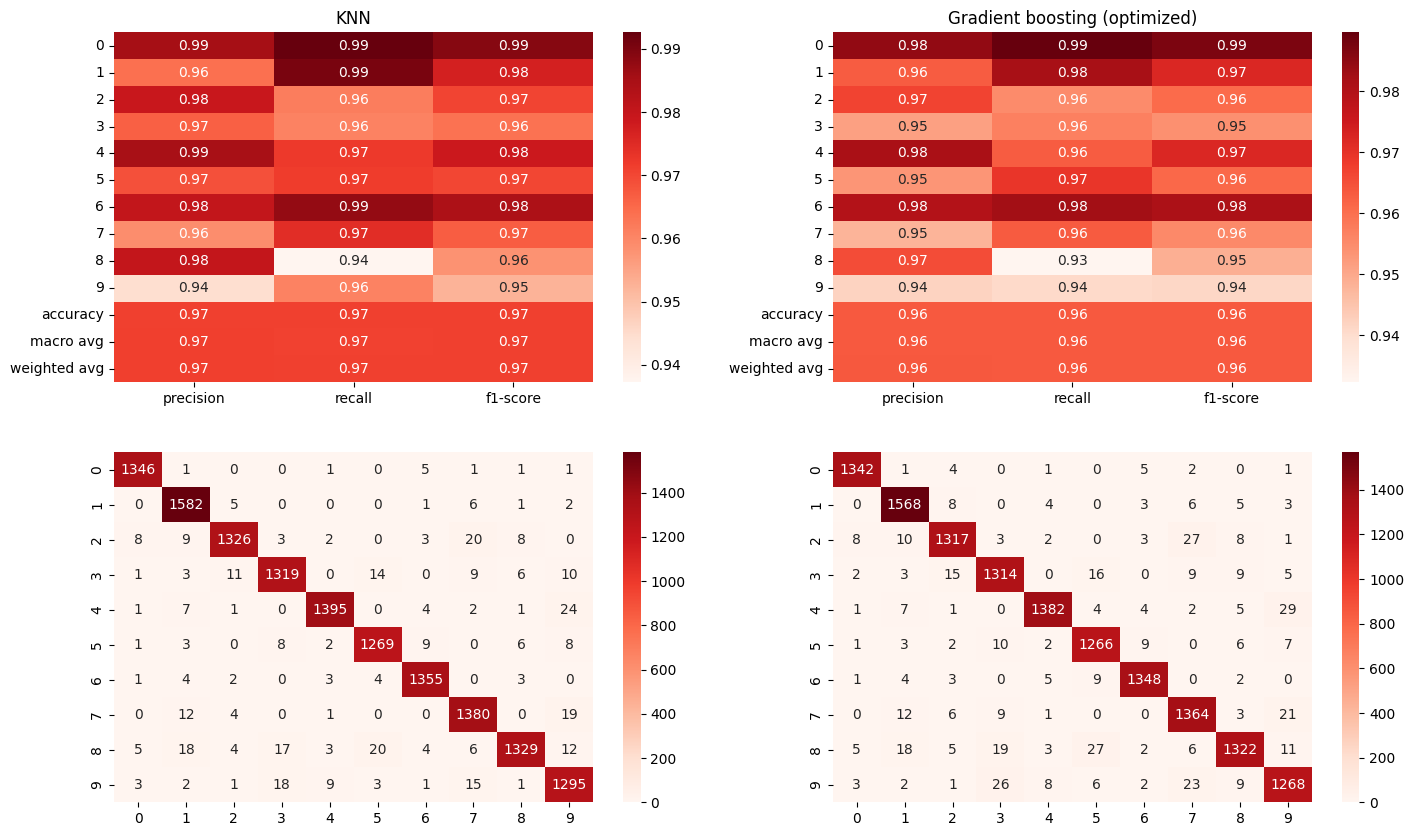

In [ ]:
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
clf_report_gbm_opt = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))
print("\nAdditional Metrics:")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}\n")

fig, axes = plt.subplots(2, 2, figsize=(17, 10))
sns.heatmap(pd.DataFrame(clf_report_best_knn).iloc[:-1, :].T, ax=axes[0, 0], annot=True, cmap='Reds')
sns.heatmap(pd.DataFrame(clf_report_gbm_opt).iloc[:-1, :].T, ax=axes[0, 1], annot=True, cmap='Reds')
sns.heatmap(confusion_matrix(y_test, best_knn.predict(X_test)), ax=axes[1, 0], annot=True, fmt='d', cmap='Reds')
sns.heatmap(confusion_matrix(y_test, y_pred), ax=axes[1, 1], annot=True, fmt='d', cmap='Reds')
axes[0, 0].set_title('KNN')
axes[0, 1].set_title('Gradient boosting (optimized)')
plt.show()

In [ ]:
def train_model_with_cv(model, X, y):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    fold_results = []
    train_acc = []
    test_acc = []

    for fold_idx, (train_ids, test_ids) in enumerate(cv.split(X, y)):
        X_train_fold, X_test_fold = X[train_ids], X[test_ids]
        y_train_fold, y_test_fold = y[train_ids], y[test_ids]

        model.fit(X_train_fold, y_train_fold)

        train_score = model.score(X_train_fold, y_train_fold)
        test_score = model.score(X_test_fold, y_test_fold)
        train_acc.append(train_score)
        test_acc.append(test_score)
        fold_results.append({'fold': fold_idx + 1, 'train_accuracy': train_score, 'test_accuracy': test_score})
        print(f"Fold {fold_idx + 1}: Train Acc = {train_score:.3f}, Test Acc = {test_score:.3f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), train_acc, 'o-', label='Train Accuracy')
    plt.plot(range(1, 11), test_acc, 'o-', label='Test Accuracy')
    plt.xticks(range(1, 11))
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.title('Cross-Validation Accuracy per Fold')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Вывод средних значений
    print(f"\nAverage Train Accuracy: {np.mean(train_acc):.3f}")
    print(f"Average Test Accuracy: {np.mean(test_acc):.3f}")

Fold 1: Train Acc = 1.000, Test Acc = 0.968
Fold 2: Train Acc = 1.000, Test Acc = 0.973
Fold 3: Train Acc = 1.000, Test Acc = 0.969
Fold 4: Train Acc = 1.000, Test Acc = 0.971
Fold 5: Train Acc = 1.000, Test Acc = 0.970
Fold 6: Train Acc = 1.000, Test Acc = 0.967
Fold 7: Train Acc = 1.000, Test Acc = 0.970
Fold 8: Train Acc = 1.000, Test Acc = 0.971
Fold 9: Train Acc = 1.000, Test Acc = 0.969
Fold 10: Train Acc = 1.000, Test Acc = 0.973


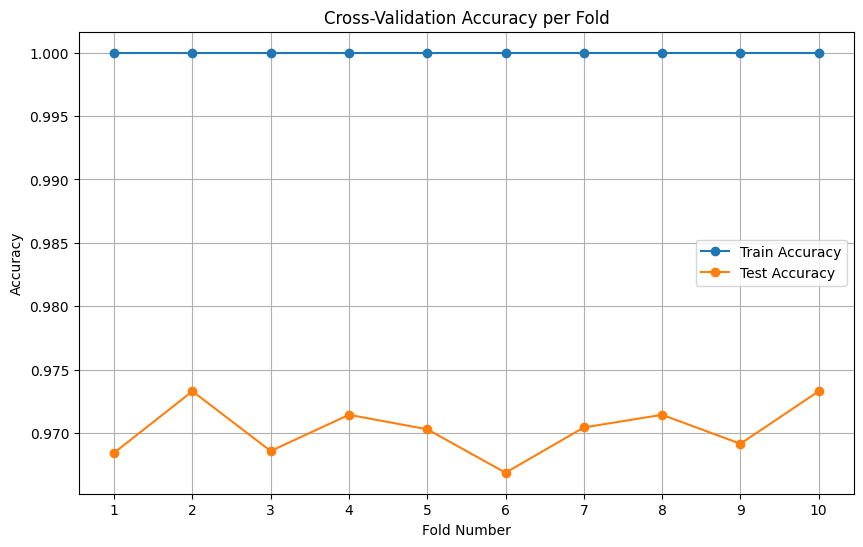


Average Train Accuracy: 1.000
Average Test Accuracy: 0.970


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance', metric='manhattan')
train_model_with_cv(knn, umap_3d_embeddings, y)

Fold 1: Train Acc = 0.979, Test Acc = 0.961
Fold 2: Train Acc = 0.978, Test Acc = 0.963
Fold 3: Train Acc = 0.978, Test Acc = 0.959
Fold 4: Train Acc = 0.975, Test Acc = 0.965
Fold 5: Train Acc = 0.978, Test Acc = 0.963
Fold 6: Train Acc = 0.977, Test Acc = 0.961
Fold 7: Train Acc = 0.978, Test Acc = 0.963
Fold 8: Train Acc = 0.978, Test Acc = 0.960
Fold 9: Train Acc = 0.978, Test Acc = 0.962
Fold 10: Train Acc = 0.978, Test Acc = 0.965


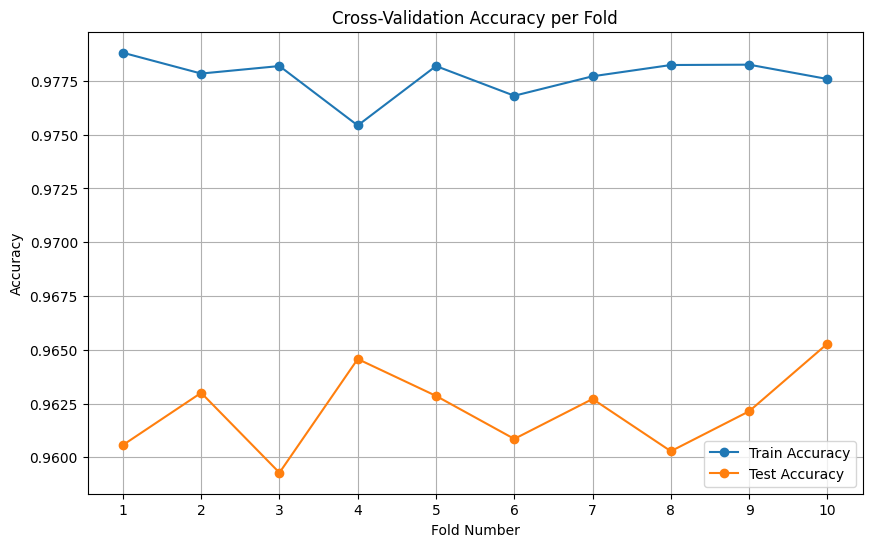


Average Train Accuracy: 0.978
Average Test Accuracy: 0.962


In [ ]:
gbm = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.8, max_features='sqrt', random_state=7)
train_model_with_cv(gbm, umap_3d_embeddings, y)